In [ ]:
import numpy as np

def initialize_network(num_inputs, num_hidden_layers, num_nodes_hidden, num_nodes_output):
    np.random.seed(42)  # Para garantir reproducibilidade
    num_nodes_previous = num_inputs
    network = {}

    for layer in range(num_hidden_layers + 1):
        if layer == num_hidden_layers:
            layer_name = 'output'
            num_nodes = num_nodes_output
        else:
            layer_name = f'layer_{layer + 1}'
            # Ensure num_nodes_hidden is a list and access the correct element
            num_nodes = num_nodes_hidden[layer] if isinstance(num_nodes_hidden, list) and layer < len(num_nodes_hidden) else num_nodes_previous


        network[layer_name] = {}
        for node in range(num_nodes):
            node_name = f'node_{node + 1}'
            network[layer_name][node_name] = {
                'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
                'bias': np.around(np.random.uniform(size=1), decimals=2)[0]
            }
        num_nodes_previous = num_nodes

    return network

def compute_weighted_sum(inputs, weights, bias):
    return np.sum(inputs * weights) + bias

def node_activation(weighted_sum):
    return 1.0 / (1.0 + np.exp(-weighted_sum))

def forward_propagate(network, inputs):
    layer_inputs = list(inputs)  # Começa com os inputs iniciais

    for layer in network:
        layer_data = network[layer]
        layer_outputs = []

        for layer_node in layer_data:
            node_data = layer_data[layer_node]
            weighted_sum = compute_weighted_sum(layer_inputs, node_data['weights'], node_data['bias'])
            node_output = node_activation(weighted_sum)
            layer_outputs.append(np.around(node_output, decimals=4))

        layer_inputs = layer_outputs  # Saída vira entrada da próxima camada

        if layer != 'output':
            print(f"🔹 Saídas da {layer}: {layer_outputs}")

    return layer_outputs

# Execution code
inputs = np.around(np.random.uniform(size=5), decimals=2)  # 5 entradas
print(f"🌟 Entradas da rede: {inputs}")
my_network = initialize_network(5, 3, [3, 2, 3], 1)
predictions = forward_propagate(my_network, inputs)
print(f"🎯 Previsão final da rede: {predictions[0]}")

🌟 Entradas da rede: [0.2  0.05 0.33 0.39 0.27]
🔹 Saídas da layer_1: [np.float64(0.6899), np.float64(0.8184), np.float64(0.7124)]
🔹 Saídas da layer_2: [np.float64(0.7519), np.float64(0.8349)]
🔹 Saídas da layer_3: [np.float64(0.7625), np.float64(0.6719), np.float64(0.8601)]
🎯 Previsão final da rede: 0.8299


🌟 Entradas: [0.44 0.12 0.5  0.03 0.91]
🔹 Saídas da layer_1: [np.float64(0.7242), np.float64(0.8085), np.float64(0.7822)]
🔹 Saídas da layer_2: [np.float64(0.7619), np.float64(0.8401)]
🔹 Saídas da layer_3: [np.float64(0.7633), np.float64(0.6727), np.float64(0.8607)]


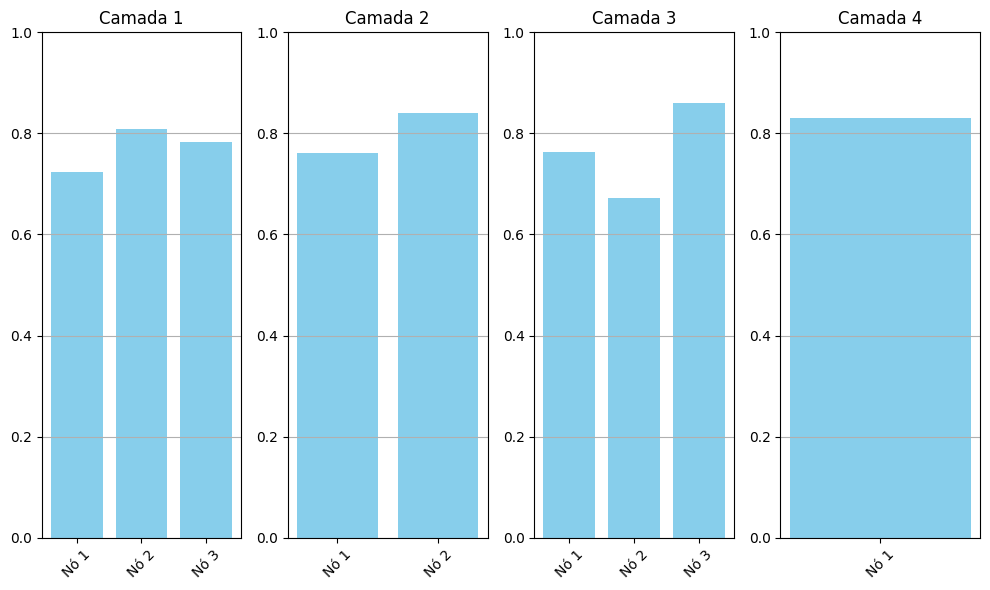

🎯 Previsão final: 0.8301


In [ ]:
import matplotlib.pyplot as plt
def plot_layer_outputs(all_layer_outputs):
    plt.figure(figsize=(10, 6))

    for i, outputs in enumerate(all_layer_outputs, 1):
        plt.subplot(1, len(all_layer_outputs), i)
        plt.bar([f"Nó {j+1}" for j in range(len(outputs))], outputs, color='skyblue')
        plt.title(f'Camada {i}')
        plt.ylim(0, 1)
        plt.xticks(rotation=45)
        plt.grid(axis='y')

    plt.tight_layout()
    plt.show()

def forward_propagate_with_tracking(network, inputs):
    layer_inputs = list(inputs)
    all_layer_outputs = []

    for layer in network:
        layer_data = network[layer]
        layer_outputs = []

        for layer_node in layer_data:
            node_data = layer_data[layer_node]
            weighted_sum = compute_weighted_sum(layer_inputs, node_data['weights'], node_data['bias'])
            node_output = node_activation(weighted_sum)
            layer_outputs.append(np.round(node_output, 4))

        if layer != 'output':
            print(f"🔹 Saídas da {layer}: {layer_outputs}")

        all_layer_outputs.append(layer_outputs)
        layer_inputs = layer_outputs

    return all_layer_outputs, layer_outputs[0]

inputs = np.round(np.random.uniform(size=5), 2)
print(f"🌟 Entradas: {inputs}")
my_network = initialize_network(5, 3, [3, 2, 3], 1)
all_outputs, final_prediction = forward_propagate_with_tracking(my_network, inputs)
plot_layer_outputs(all_outputs)
print(f"🎯 Previsão final: {final_prediction}")

In [ ]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
def sigmoid_derivative(x):
    sig = 1.0 / (1.0 + np.exp(-x))
    return sig * (1 - sig)
def train_network(X, y, epochs=1000, lr=0.1, l2_lambda=0.01):
    np.random.seed(42)

    # Inicialização
    w1 = np.random.uniform(size=(2, 2))
    b1 = np.random.uniform(size=2)
    w2 = np.random.uniform(size=2)
    b2 = np.random.uniform()

    for epoch in range(epochs):
        # 🔃 Forward Pass
        z1 = np.dot(X, w1) + b1
        a1 = 1 / (1 + np.exp(-z1))  # Sigmoide
        z2 = np.dot(a1, w2) + b2
        a2 = 1 / (1 + np.exp(-z2))

        # 🎯 Função de Custo com Regularização L2
        cost = mean_squared_error(y, a2) + l2_lambda * (np.sum(w1**2) + np.sum(w2**2))

        # 🔁 Backpropagation
        dz2 = (a2 - y) * sigmoid_derivative(z2)
        dw2 = np.dot(a1.T, dz2) + l2_lambda * w2
        db2 = np.sum(dz2)

        dz1 = np.dot(dz2.reshape(-1,1), w2.reshape(1,-1)) * sigmoid_derivative(z1)
        dw1 = np.dot(X.T, dz1) + l2_lambda * w1
        db1 = np.sum(dz1, axis=0)

        # 🔧 Atualizações (Gradiente Descendente)
        w2 -= lr * dw2
        b2 -= lr * db2
        w1 -= lr * dw1
        b1 -= lr * db1

        # 📈 Visualização de custo
        if epoch % 100 == 0:
            print(f'Época {epoch}, Custo: {round(cost, 4)}')

    print("✅ Treinamento concluído.")
    return w1, b1, w2, b2
# Entradas e rótulos (XOR simplificado)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

# Treinar rede
train_network(X, y, epochs=1000, lr=0.1, l2_lambda=0.01)


Época 0, Custo: 0.3516
Época 100, Custo: 0.2681
Época 200, Custo: 0.2654
Época 300, Custo: 0.2632
Época 400, Custo: 0.2613
Época 500, Custo: 0.2598
Época 600, Custo: 0.2584
Época 700, Custo: 0.2572
Época 800, Custo: 0.2562
Época 900, Custo: 0.2554
✅ Treinamento concluído.


(array([[0.10266512, 0.43608147],
        [0.25024884, 0.34884353]]),
 array([0.15134754, 0.17257692]),
 array([-0.12686866,  0.26830764]),
 np.float64(-0.09754342603829258))